In [54]:
import pandas as pd
data = pd.read_csv('data/listings.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8795 entries, 0 to 8794
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8795 non-null   int64  
 1   listing_url                                   8795 non-null   object 
 2   scrape_id                                     8795 non-null   int64  
 3   last_scraped                                  8795 non-null   object 
 4   name                                          8777 non-null   object 
 5   description                                   8541 non-null   object 
 6   neighborhood_overview                         4966 non-null   object 
 7   picture_url                                   8795 non-null   object 
 8   host_id                                       8795 non-null   int64  
 9   host_url                                      8795 non-null   o

In [23]:
data['price_kr'] = data['price'].str[1:]  # remove $-sign
data['price_kr'] = data['price_kr'].str.replace(',', '').astype(float)  # remove commas
data['price_kr'] = data['price_kr'] * 9  # dollar to nok
data['price_kr']

0        18009.0
1         3195.0
2       288045.0
3         4833.0
4        20142.0
          ...   
8790      5571.0
8791      3600.0
8792      4500.0
8793      3438.0
8794      9909.0
Name: price_kr, Length: 8795, dtype: float64

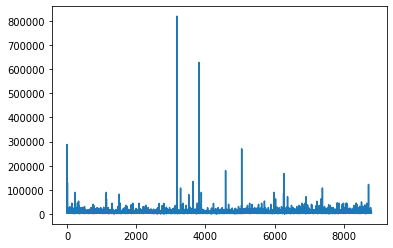

In [30]:
data['price_kr'].plot()

In [50]:
data.groupby('neighbourhood_cleansed')['price_kr'].value_counts(bins=10)

neighbourhood_cleansed                    
Alna                    (1531.565, 5009.4]    79
                        (5009.4, 8452.8]      32
                        (8452.8, 11896.2]     12
                        (18783.0, 22226.4]     3
                        (11896.2, 15339.6]     3
                                              ..
Østensjø                (22851.9, 29869.2]     1
                        (57938.4, 64955.7]     0
                        (50921.1, 57938.4]     0
                        (43903.8, 50921.1]     0
                        (36886.5, 43903.8]     0
Name: price_kr, Length: 170, dtype: int64

In [53]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [52]:
redundant_cols = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_about',
       'host_thumbnail_url', 'host_picture_url', 'neighbourhood_group_cleansed', ]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_kr
0,42932,https://www.airbnb.com/rooms/42932,20200727143025,2020-07-28,"Charming apartment, Oslo Center, Ro","Charming apartment, Oslo Center, Royal House T...",(URL HIDDEN),https://a0.muscache.com/im/pictures/e84133b1-2...,187463,https://www.airbnb.com/users/show/187463,Cecilie,2010-08-01,"Oslo, Oslo, Norway","Fashion clothing designer,Concept developer 47...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/187463/profil...,https://a0.muscache.com/im/users/187463/profil...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Frogner,Frogner,NaN,59.91234,10.72384,Apartment,Entire home/apt,3,1.0,NaN,2.0,3.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free str...","$2,001.00",3,300,3,3,300,300,3.0,300.0,14 months ago,t,28,58,88,363,2020-07-28,38,1,NaN,2013-09-02,2020-01-13,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,1,1,0,0,0.45,18009.0
1,43198,https://www.airbnb.com/rooms/43198,20200727143025,2020-07-28,Lovely low budgetroom in nice area!,"This is a small, bright room, facing our quiet...",Only five minutes walk from the castle and the...,https://a0.muscache.com/im/pictures/73523d9a-a...,4011871,https://www.airbnb.com/users/show/4011871,Mona Johanne,2012-10-30,"Oslo, Oslo, Norway","We offer a beautiful, spacious room with high ...",within a few hours,100%,98%,t,https://a0.muscache.com/im/users/4011871/profi...,https://a0.muscache.com/im/users/4011871/profi...,NaN,2.0,2.0,"['phone', 'facebook', 'google', 'reviews', 'ju...",t,f,Frogner,Frogner,NaN,59.91781,10.71435,Apartment,Private room,3,0.5,NaN,1.0,1.0,"{Wifi,Kitchen,""Pets live on this property"",Cat...",$355.00,2,4,2,2,4,4,2.0,4.0,12 months ago,t,0,0,0,0,2020-07-28,36,0,NaN,2015-06-29,2019-07-28,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,0,2,0,0.58,3195.0
2,67457,https://www.airbnb.com/rooms/67457,20200727143025,2020-07-28,Large and modern tow-floor apart.,This apartment is in a well established and at...,NaN,https://a0.muscache.com/im/pictures/421586/d20...,332688,https://www.airbnb.com/users/show/332688,Petter,2011-01-02,"Oslo, Oslo, Norway",I was born and raised in Oslo and have spent m...,NaN,NaN,83%,f,https://a0.muscache.com/im/pictures/user/c11a5...,https://a0.muscache.com/im/pictures/user/c11a5...,Gamle Oslo,2.0,2.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,NaN,Vestre Aker,NaN,59.95515,10.66396,Apartment,Entire home/apt,4,NaN,NaN,1.0,3.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","$32,005.00",30,730,30,30,730,730,30.0,730.0,never,t,30,60,90,365,2020-07-28,1,0,NaN,2011-03-08,2011-03-08,100.0,8.0,10.0,10.0,10.0,8.0,8.0,NaN,f,2,2,0,0,0.01,288045.0
3,71725,https://www.airbnb.com/rooms/71725,20200727143025,2020-07-28,Central big room - ap with ba